In [18]:
import numpy as np
import pandas as pd

In [35]:
banka = pd.read_csv ("hmelq.csv")
df = banka.copy()
df = df.dropna()
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bad,2018.0,0.088206,0.283665,0.00,0.0000,0.000,0.0000,1.000
loan,2018.0,19010.257681,10768.607345,1700.00,12000.0000,16900.000,23600.0000,89900.000
mortdue,2018.0,76337.035183,44476.368189,5076.00,49577.2500,67595.000,92922.7500,399412.000
value,2018.0,106899.244797,54026.707096,23031.00,71287.2500,94514.000,121220.7500,512650.000
yoj,2018.0,9.003964,7.573012,0.00,3.0000,7.000,13.0000,41.000
derog,2018.0,0.150149,0.580421,0.00,0.0000,0.000,0.0000,10.000
delinq,2018.0,0.264123,0.789816,0.00,0.0000,0.000,0.0000,10.000
clage,2018.0,180.645020,84.420116,0.49,118.2050,176.670,229.6925,1168.230
ninq,2018.0,1.037661,1.578414,0.00,0.0000,0.000,2.0000,13.000
clno,2018.0,22.265114,9.457238,0.00,16.0000,21.000,27.0000,64.000


In [6]:
df.shape

(2018, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
bad        2018 non-null int64
loan       2018 non-null int64
mortdue    2018 non-null float64
value      2018 non-null float64
reason     2018 non-null object
job        2018 non-null object
yoj        2018 non-null float64
derog      2018 non-null float64
delinq     2018 non-null float64
clage      2018 non-null float64
ninq       2018 non-null float64
clno       2018 non-null float64
debtinc    2018 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 220.7+ KB


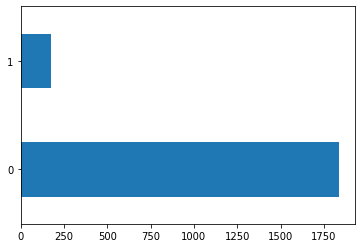

In [37]:
df["bad"].value_counts().plot.barh()

In [38]:
df ["bad"].value_counts()

0    1840
1     178
Name: bad, dtype: int64

In [39]:
y = df["bad"]
X = df.drop(["bad", "reason", "job"], axis = 1)

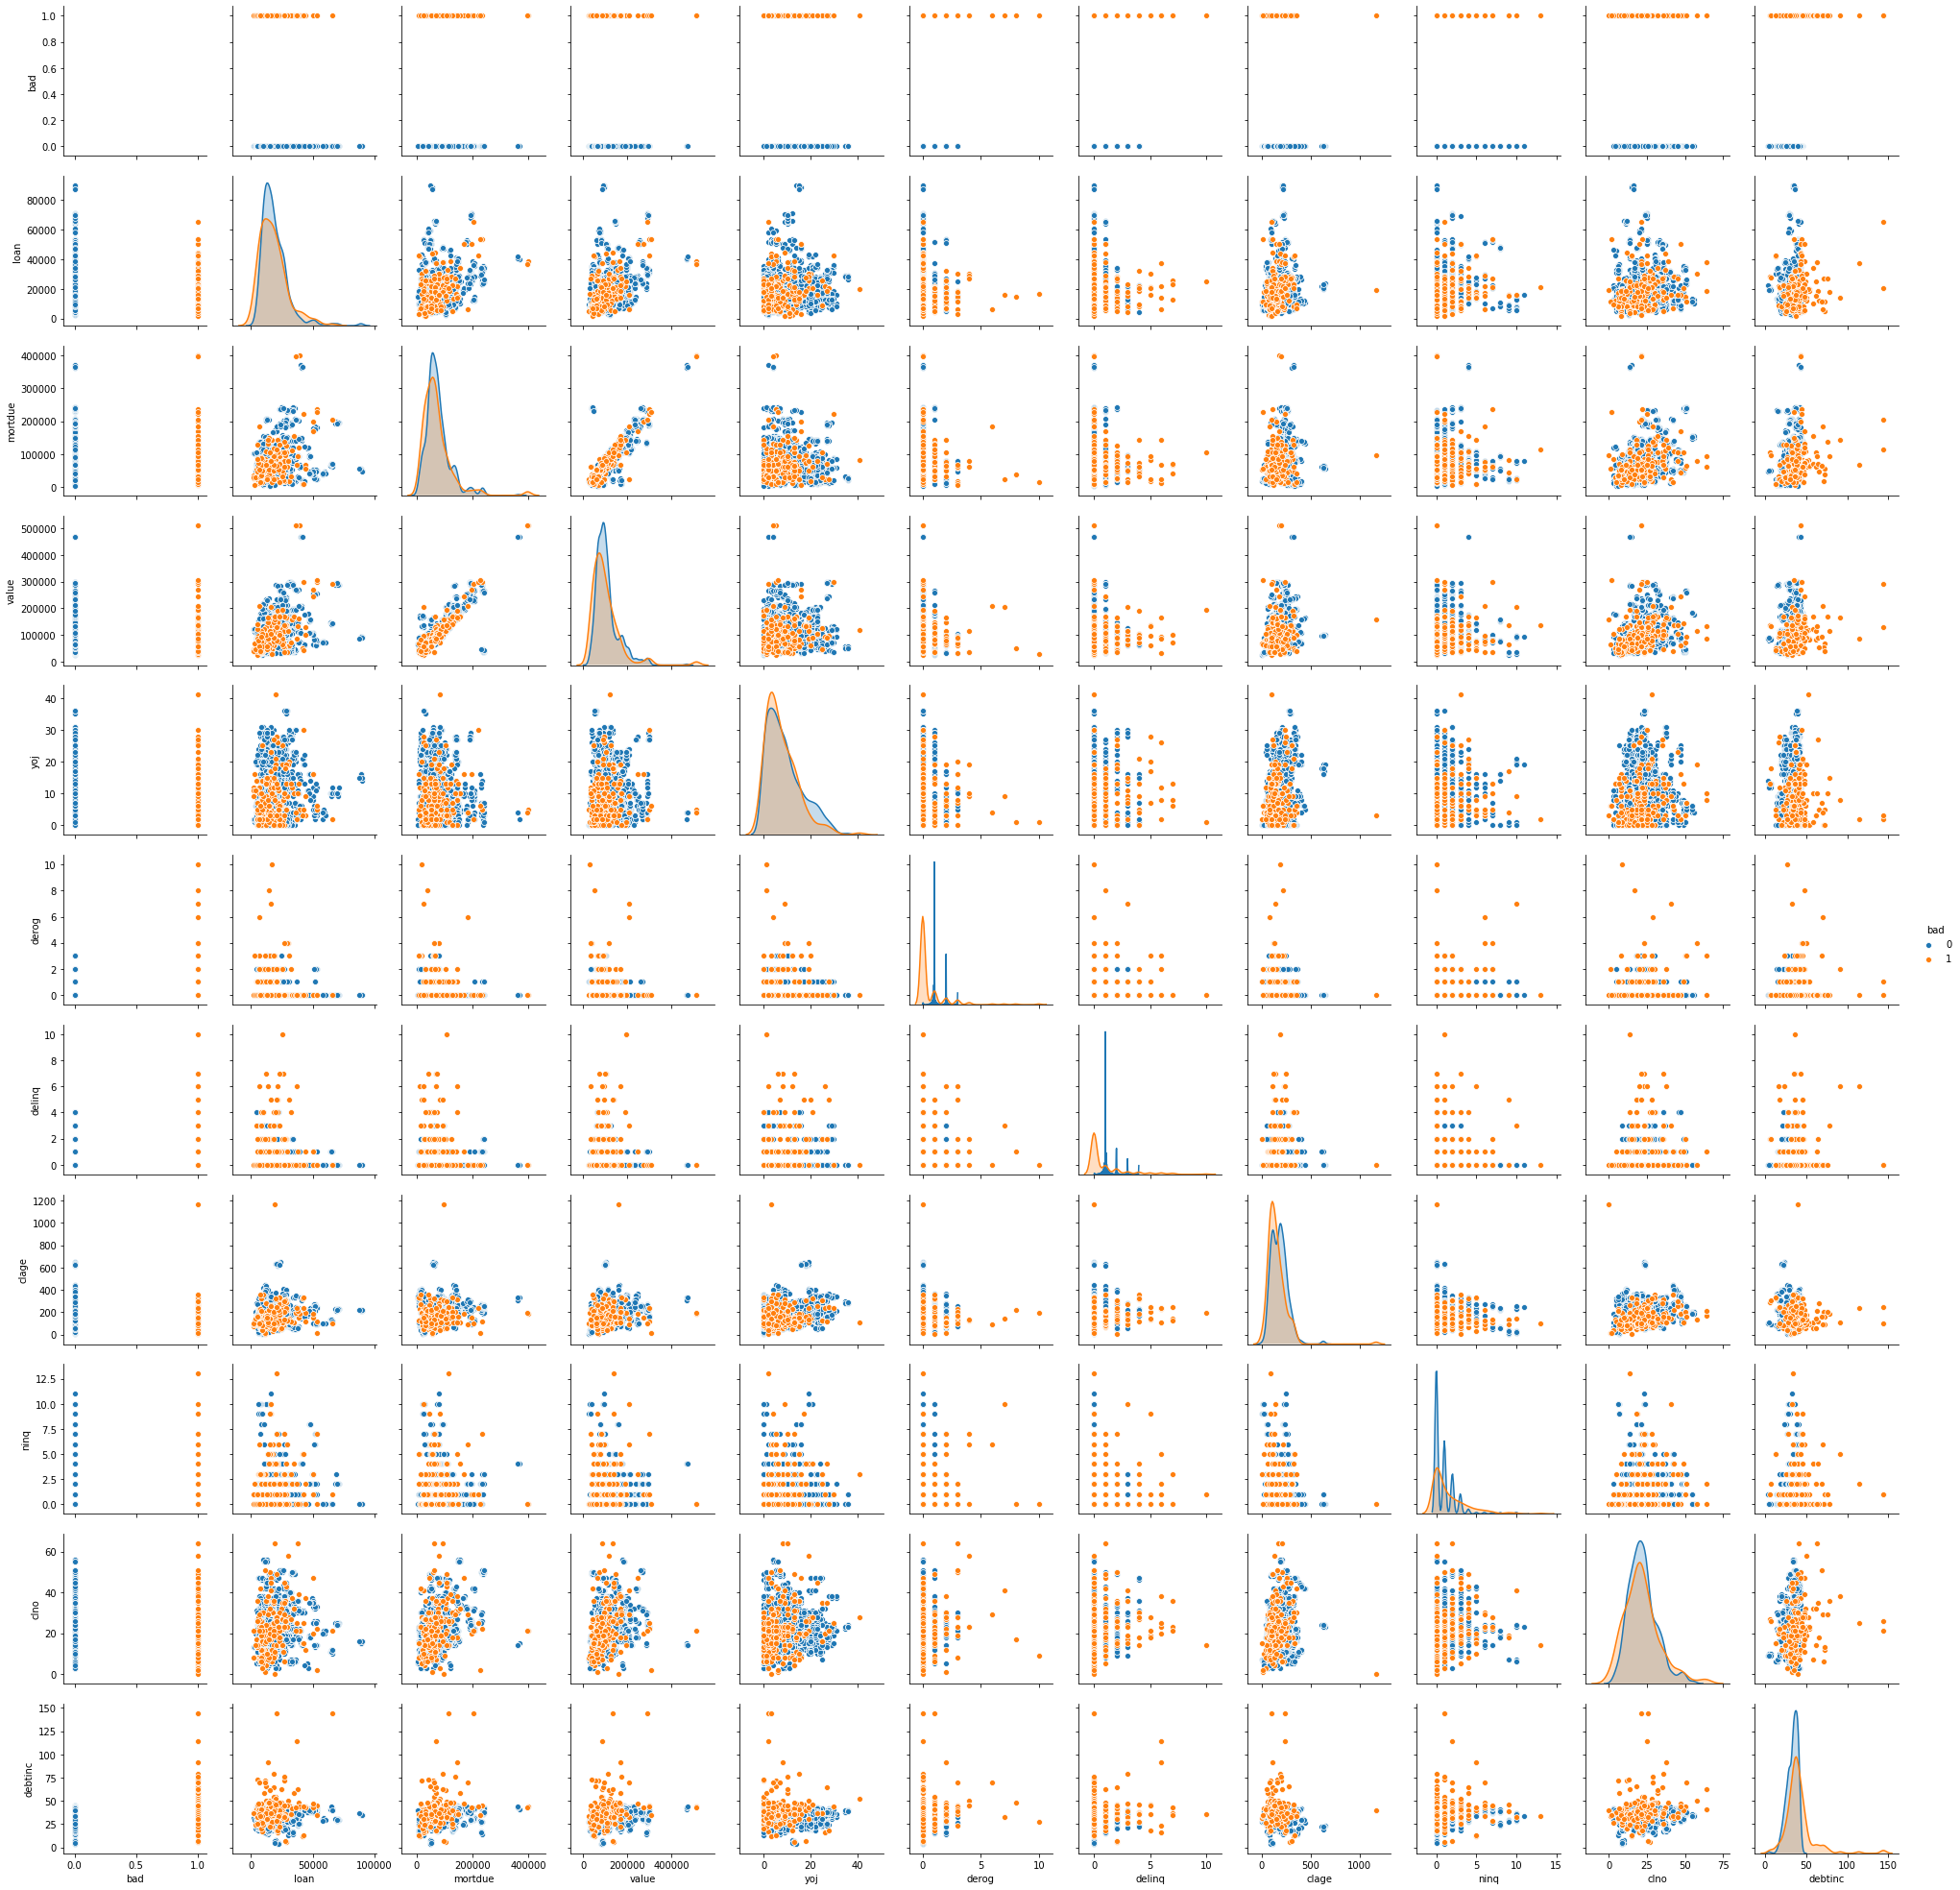

In [31]:
sns.pairplot(df, hue = "bad")

In [40]:
import statsmodels.api as sm
loj = sm.Logit(y,X)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.261768
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2008
Method:                           MLE   Df Model:                            9
Date:                Sun, 22 Sep 2019   Pseudo R-squ.:                  0.1227
Time:                        12:26:34   Log-Likelihood:                -528.25
converged:                       True   LL-Null:                       -602.11
Covariance Type:            nonrobust   LLR p-value:                 2.621e-27
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan       -2.706e-05   1.04e-05     -2.600      0.009   -4.74e-05   -6.66e-06
mortdue    -3.409e-07   5.22e-06     -0.065      0.948   -1.06e-05     9.9e-06
value      -3.173e-06   4.29e-06     -0.739      0.460   -1.16e-05    5.24e-06
yoj           -0.0342      0.013     -2.727      0.006      -0.059      -0.010
derog          0.5800      0.122      4.758      0.000       0.341       0.819
delinq         0.7398      0.086      8.610      0.000       0.571       0.908
clage         -0.0084      0.001     -6.358      0.000      -0.011      -0.006
ninq           0.0266      0.047      0.571      0.568      -0.065       0.118
clno          -0.0505      0.011     -4.635      0.000      -0.072      -0.029
debtinc        0.0222      0.007      3.126      0.002       0.008       0.036
==============================================================================
"""

In [41]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = 'liblinear')
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
loj_model.intercept_

array([-0.00360811])

In [43]:
loj_model.coef_

array([[-3.66470999e-05, -7.69225368e-06, -1.73822412e-06,
        -2.36700535e-02,  9.04720109e-03,  1.62326159e-02,
        -8.41197870e-03,  5.57430101e-03, -2.29544402e-02,
         3.30980718e-02]])

In [44]:
y_pred = loj_model.predict(X)

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
confusion_matrix(y,y_pred)

array([[1833,    7],
       [ 174,    4]], dtype=int64)

In [46]:
accuracy_score(y,y_pred)

0.9103072348860257

In [47]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1840
           1       0.36      0.02      0.04       178

    accuracy                           0.91      2018
   macro avg       0.64      0.51      0.50      2018
weighted avg       0.86      0.91      0.87      2018



In [49]:
y_probs =  loj_model.predict_proba(X)
y_probs = y_probs[:,1]
y_probs[0:10]

array([0.05701189, 0.18321091, 0.01052507, 0.16626594, 0.17145038,
       0.01679495, 0.14417248, 0.03265885, 0.25147498, 0.0396369 ])

In [50]:
confusion_matrix(y,y_pred)

array([[1833,    7],
       [ 174,    4]], dtype=int64)

In [51]:
accuracy_score(y,y_pred)

0.9103072348860257

In [52]:
loj_model.predict(X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
from sklearn.metrics import roc_auc_score,roc_curve
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))
logit_roc_auc

0.5093337811431363

In [54]:
fpr, tpr, threshold = roc_curve(y, loj_model.predict_proba(X)[:,1])
fpr[0:10]

array([0.        , 0.00054348, 0.00271739, 0.00271739, 0.0048913 ,
       0.0048913 , 0.00543478, 0.00543478, 0.00597826, 0.00597826])

Text(0, 0.5, 'True Positive Oranı')

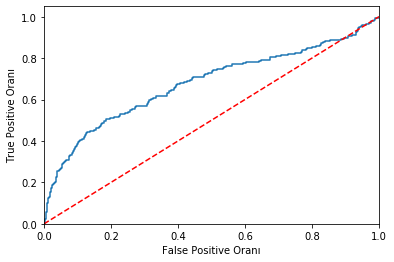

In [55]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state = 42)

In [57]:
loj = LogisticRegression (solver = "liblinear")
loj_model = loj.fit(X_train, y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
accuracy_score (y_test, loj_model.predict(X_test))
cross_val_score (loj_model, X_test, y_test, cv = 10).mean()

0.919090428344791